In [79]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("messages.csv")
df.shift()

,subject,message,label
0,NaN,NaN,NaN
1,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0.0
2,NaN,"lang classification grimes , joseph e . and ba...",0.0
3,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0.0
4,risk,a colleague and i are researching the differin...,0.0
...,...,...,...
2888,win $ 300usd and a cruise !,"raquel 's casino , inc . is awarding a cruise ...",1.0
2889,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1.0
2890,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1.0
2891,anglicization of composers ' names,"judging from the return post , i must have sou...",0.0


In [80]:
def explore(dataframe):
    
    print("Total Records: ", dataframe.shape[0])
          
    
    x = dataframe.columns[dataframe.isnull().any()].tolist()   
    if not x:
        print("No Missing/Null Records")
    else:        
        print("Found Missing Records")

#Смотрим путь хама и спама(Подойдут любые форматы данных)
def msgs(path):
  data = []
  #path = 'content/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with io.open(path+file, "r", errors='ignore') as f:
      data.append(f.read())
      
  return data

In [81]:
explore(df)

Total Records:  2893
Found Missing Records


In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(2831, 3)

In [84]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [85]:
df.drop_duplicates(inplace=True)
print(df.shape)

(2814, 3)


In [86]:
# to show the number of missing data
print(df.isnull().sum())

subject    0
message    0
label      0
dtype: int64


In [87]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
explore(df)

Total Records:  2814
No Missing/Null Records


In [89]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['message'].head().apply(process)

0    [content, length, 3386, appleiss, research, ce...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
5    [content, length, 4437, call, papers, best, go...
Name: message, dtype: object

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['message'])

In [91]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['label'], test_size=0.20, random_state=0)
print(message.shape)

(2814, 63712)


In [92]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [93]:
print(classifier.predict(xtrain))

[0 1 1 ... 0 0 0]


In [94]:
print(ytrain.values)

[0 1 1 ... 0 0 0]


In [95]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1894
           1       0.98      0.99      0.99       357

    accuracy                           1.00      2251
   macro avg       0.99      1.00      0.99      2251
weighted avg       1.00      1.00      1.00      2251


Confusion Matrix: 
 [[1887    7]
 [   2  355]]
Accuracy: 
 0.9960017769880053


In [96]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 

In [97]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       465
           1       0.97      0.97      0.97        98

    accuracy                           0.99       563
   macro avg       0.98      0.98      0.98       563
weighted avg       0.99      0.99      0.99       563


Confusion Matrix: 
 [[462   3]
 [  3  95]]
Accuracy: 
 0.9893428063943162


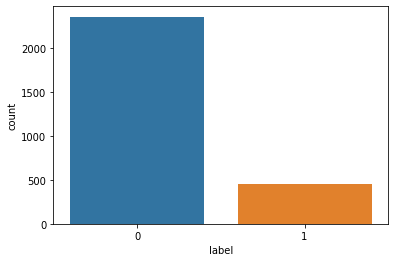

In [99]:
sns.countplot(data=df, x="label")
plt.show()

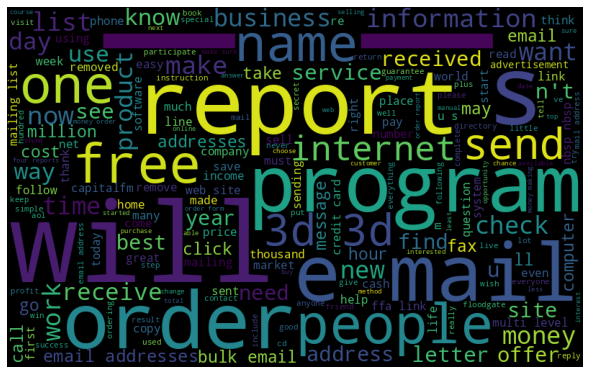

In [102]:
from wordcloud import WordCloud

#Позитивные слова(т.е. те что не могут встречатся в спам письмах)
words_list = df[df['label']==1]['message'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

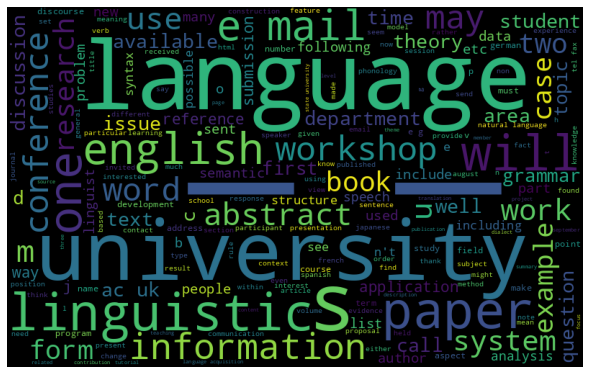

In [103]:
#Негативные слова(т.е. те что могут встречатся в спам письмах)
words_list = df[df['label']==0]['message'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()